# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9473684210526315

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Black bears      0.888889
Teddybears       1.000000
Grizzly bears    0.964286
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Black bears,Teddybears,Grizzly bears
Black bears,0.888889,0.0,0.111111
Teddybears,0.000000,1.0,0.000000
Grizzly bears,0.035714,0.0,0.964286


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Black bears propability,Teddybears propability,Grizzly bears propability,true,predicted,error,confidence
22,0.002123,0.000701,0.997177,[Black bears],[Grizzly bears],0.665252,0.995766
93,0.104008,0.000035,0.895957,[Black bears],[Grizzly bears],0.597328,0.848726
79,0.278532,0.013980,0.707489,[Black bears],[Grizzly bears],0.480979,0.606196
15,0.634305,0.000891,0.364804,[Grizzly bears],[Black bears],0.423464,0.550580
8,0.380728,0.000079,0.619193,[Black bears],[Grizzly bears],0.412848,0.540861


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Black bears propability,Teddybears propability,Grizzly bears propability,true,predicted,error,confidence
9,0.601616,0.007129,0.391255,[Black bears],[Black bears],0.265590,0.522120
8,0.380728,0.000079,0.619193,[Black bears],[Grizzly bears],0.412848,0.540861
15,0.634305,0.000891,0.364804,[Grizzly bears],[Black bears],0.423464,0.550580
43,0.103111,0.697202,0.199687,[Teddybears],[Teddybears],0.201865,0.552174
79,0.278532,0.013980,0.707489,[Black bears],[Grizzly bears],0.480979,0.606196


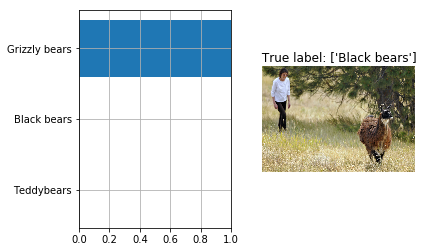

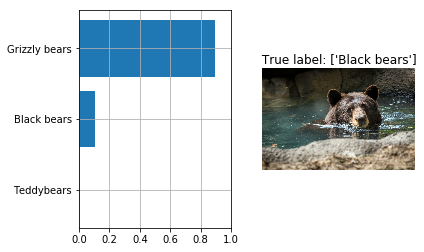

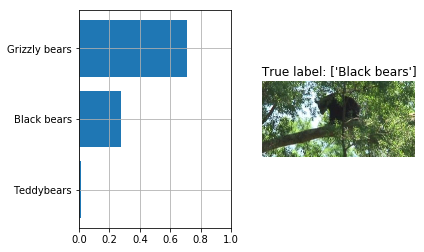

In [15]:
interpreter.plot_most_incorrect_samples(3)

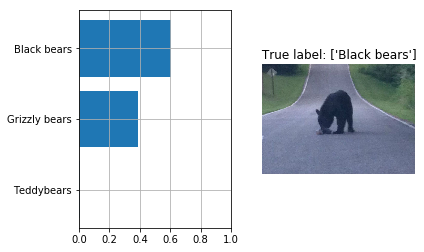

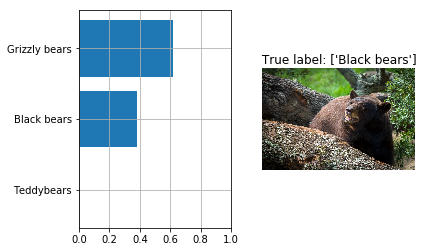

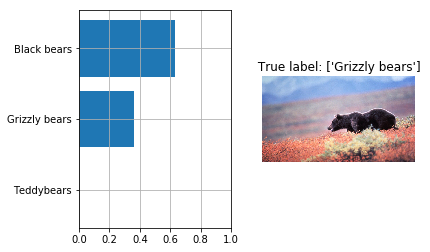

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=94), Output()), _do…